In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import functions as f 
import importlib
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import pdist, squareform, euclidean
from sklearn.decomposition import PCA
importlib.reload(f)
pd.set_option('display.max_colwidth', None)
# Set display options to show all rows and columns without truncation
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping in the output

C:\Users\Armand Ovanessians\AppData\Roaming\Python\Python311\site-packages\Bio\pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [3]:
import torch
from torch_geometric.data import Data
from torch_geometric.utils import from_networkx
import networkx as nx

In [4]:
# Step 1: Load the data from the provided files
df_alba = pd.read_csv("Data/normalized_features.csv")
print(f"Columns albatros {df_alba.columns}") 
print("-"*20) 
df_feat = pd.read_csv("Data/Molecular_Features.csv") 
print(f"Columns features {df_feat.columns}")
print("-"*20) 
# load meta information 
file_path_sup = 'Supplementary_tables'
df_meta = f.get_data(file_path_sup)["Table_S1"]
print(f"Columns Meta Features {df_meta.columns}")

Columns albatros Index(['IDR ID', 'ad_clone_id', 'IDR start', 'IDR end', 'IDR len', 'Rg (A)',
       'Re (A)', 'asphericity', 'scaling_exponent', 'prefactor', 'FCR', 'NCPR',
       'kappa', 'fract_negative', 'fract_positive', 'fract_aro', 'fract_pro',
       'fract_polar', 'fract_ali', 'dis_sequence', 'gene_symbol',
       'isoform_status', 'aa_seq'],
      dtype='object')
--------------------
Columns features Index(['IDR ID', 'REP_Q2', 'REP_N2', 'REP_S2', 'REP_G2', 'REP_E2', 'REP_D2',
       'REP_K2', 'REP_R2', 'REP_P2',
       ...
       'KL_hydropathy', 'isoelectric_point', 'FCR', 'ED_ratio', 'RK_ratio',
       'SCD', 'kappa*', 'omega*', 'aromatic_spacing*', 'omega_aromatic*'],
      dtype='object', length=148)
--------------------
Columns Meta Features Index(['clone_id', 'gene_symbol', 'isoform_status', 'gencode_transcript_names',
       'ensembl_transcript_ids', 'cds_seq', 'aa_seq', 'tf_family'],
      dtype='object')


In [5]:
df_alba_sub = df_alba[["ad_clone_id", "IDR ID", "IDR end", "IDR start", "IDR len" ]]
print(df_alba.shape)
print(df_feat.shape)
df_IDRs = pd.merge(df_alba_sub, df_feat)
df_IDRs.rename(columns = {"ad_clone_id" : "clone_id"}, inplace=True)
df_IDRs.head()

(1253, 23)
(1253, 148)


,clone_id,IDR ID,IDR end,IDR start,IDR len,REP_Q2,REP_N2,REP_S2,REP_G2,REP_E2,REP_D2,REP_K2,REP_R2,REP_P2,REP_QN2,REP_RG2,REP_PR,REP_FG2,REP_SG2,REP_SR2,REP_KAP2,REP_PTS2,CLV_C14_Caspase3-7,DEG_APCC_KENBOX_2,DEG_Kelch_Keap1_1,DEG_SCF_TRCP1_1,DOC_ANK_TNKS_1,DOC_CYCLIN_RxL_1,DOC_MAPK_gen_1,DOC_MAPK_JIP1_4,DOC_MAPK_MEF2A_6,DOC_MAPK_NFAT4_5,DOC_PP1_RVXF_1,DOC_PP2A_B56_1,DOC_PP4_FxxP_1,DOC_WW_Pin1_4,LIG_14-3-3_CanoR_1,LIG_CaM_IQ_9,LIG_CtBP_PxDLS_1,LIG_EF_ALG2_ABM_1,LIG_EH_1,LIG_HCF-1_HBM_1,LIG_HOMEOBOX,LIG_KEPE_2,LIG_KLC1_WD_1,LIG_LIR_Gen_1,LIG_PAM2_1,LIG_PCNA_PIPBox_1,LIG_PDZ_Class_1,LIG_PDZ_Wminus1_1,LIG_PTAP_UEV_1,LIG_PTB_Apo_2,LIG_PTB_Phospho_1,LIG_Rb_LxCxE_1,LIG_SH2_CRK,LIG_SH2_GRB2like,LIG_SH2_NCK_1,LIG_SH2_SRC,LIG_SH2_STAP1,LIG_SH2_STAT5,LIG_SH3_2,LIG_SUMO_SIM_anti_2,LIG_SUMO_SIM_par_1,LIG_WRPW_1,MOD_CDK_SPK_2,MOD_CDK_SPxK_1,MOD_CDK_SPxxK_3,MOD_CK1_1,MOD_CK2_1,MOD_DYRK1A_RPxSP_1,MOD_GSK3_1,MOD_N-GLC_1,MOD_NMyristoyl,MOD_PIKK_1,MOD_PKA_1,MOD_PKA_2,MOD_PKB_1,MOD_Plk_1,MOD_ProDKin_1,MOD_SUMO_for_1,MOD_SUMO_rev_2,TRG_ER_diArg_1,TRG_ER_FFAT_1,TRG_LysEnd_APsAcLL_1,TRG_NES_CRM1_1,TRG_NLS_MonoExtN_4,A_homorep,C_homorep,D_homorep,E_homorep,G_homorep,H_homorep,I_homorep,K_homorep,L_homorep,M_homorep,N_homorep,P_homorep,Q_homorep,R_homorep,S_homorep,T_homorep,V_homorep,Y_homorep,FG_rich,PY,FRG,SGFYSG,PG_rich,ELASTIN_LIKE,FGxF,R_plus_Y,REP_RGG,AA_S,AA_P,AA_T,AA_A,AA_H,AA_Q,AA_N,AA_G,AA_R,AA_C,AA_D,AA_E,AA_F,AA_I,AA_K,AA_L,AA_M,AA_V,AA_W,AA_Y,acidic,basic,aliphatic,polar_fraction,chain_expanding,aromatic,disorder_promoting,net_charge,WF_complexity,KL_hydropathy,isoelectric_point,FCR,ED_ratio,RK_ratio,SCD,kappa*,omega*,aromatic_spacing*,omega_aromatic*
0,AEBP2-2,AEBP2-2_1_28,28,1,28,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,4.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,1.0,4.0,1.0,0.0,1.0,1.0,3.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,3.0,1.0,0.0,0.0,2.0,2.0,6.0,17.0,5.0,0.0,22.0,0.0,0.594064,-0.650000,5.959961,0.142857,-1.098612,0.000000,-0.360944,-0.084228,-0.120244,NaN,NaN
1,AEBP2-2,AEBP2-2_113_163,163,113,51,1.0,0.0,2.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,4.0,3.0,1.0,3.0,6.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,8.0,4.0,1.0,3.0,2.0,4.0,3.0,3.0,6.0,0.0,0.0,2.0,1.0,0.0,8.0,3.0,1.0,2.0,0.0,0.0,2.0,14.0,9.0,21.0,20.0,1.0,41.0,12.0,0.713555,-1.586275,12.022461,0.313725,1.098612,-0.251314,4.172293,0.212948,-0.275983,NaN,NaN
2,AEBP2-3,AEBP2-3_1_41,41,1,41,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,7.0,7.0,1.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,12.0,1.0,6.0,1.0,0.0,1.0,1.0,3.0,3.0,0.0,2.0,0.0,0.0,3.0,1.0,0.0,4.0,1.0,0.0,2.0,2.0,4.0,9.0,23.0,7.0,2.0,30.0,2.0,0.631208,-0.573171,9.694336,0.146341,-1.098612,0.693147,-0.042468,0.157837,-0.197255,0.949757,0.949757
3,AEBP2-3,AEBP2-3_132_177,177,132,46,1.0,0.0,2.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,3.0,4.0,0.0,2.0,6.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.

In [6]:
### Import Repressor and Activator dataset
df_effec = f.get_data(file_path_sup)["Table_S4"]
df_effec[["clone_id", "M1H_mean"]]
#df_effec.head()
df_effec.head()

,clone_id,gene_symbol,M1H_rep1,M1H_rep2,M1H_rep3,M1H_mean
0,AEBP2-2,AEBP2,0.241019,0.189211,0.473661,0.301297
1,AEBP2-3,AEBP2,-0.276303,-0.305477,-0.121186,-0.234322
2,ARNT2-1,ARNT2,4.498733,4.501519,4.297244,4.432498
3,ARNT2-2,ARNT2,2.407721,2.407411,2.197963,2.337698
4,ARNTL2-2,ARNTL2,0.398027,0.391809,0.299461,0.363099


In [28]:
df_IDRs_effect = df_IDRs[df_IDRs['clone_id'].isin(df_effec['clone_id'])]
print(df_IDRs_effect.shape)
df_IDRs_effect.head()
df_IDRs_effect.columns

(1032, 152)


Index(['clone_id', 'IDR ID', 'IDR end', 'IDR start', 'IDR len', 'REP_Q2',
       'REP_N2', 'REP_S2', 'REP_G2', 'REP_E2',
       ...
       'KL_hydropathy', 'isoelectric_point', 'FCR', 'ED_ratio', 'RK_ratio',
       'SCD', 'kappa*', 'omega*', 'aromatic_spacing*', 'omega_aromatic*'],
      dtype='object', length=152)

In [42]:
# Exclude the first two columns (assuming they're not features)
df_features_only = df_IDRs_effect.iloc[:, 2:]

# Set a variance threshold (e.g., 0.01)
threshold = 0.05

# Calculate variance for each numerical column
variance = df_features_only.var()

# Filter out columns with variance below the threshold
variable_columns = variance[variance >= threshold].index

# Select only columns that pass the variance threshold
df_variable = df_features_only[variable_columns]

# Combine the first two non-feature columns back with the filtered feature columns
df_preprocessed = pd.concat([df_IDRs_effect.iloc[:, :2], df_variable], axis=1)

# Display the preprocessed DataFrame
print(df_preprocessed.shape)

df_preprocessed.head()

(1032, 103)


,clone_id,IDR ID,IDR end,IDR start,IDR len,REP_Q2,REP_N2,REP_S2,REP_G2,REP_E2,REP_D2,REP_K2,REP_R2,REP_P2,REP_QN2,REP_RG2,REP_PR,REP_FG2,REP_SG2,REP_SR2,REP_KAP2,REP_PTS2,CLV_C14_Caspase3-7,DOC_ANK_TNKS_1,DOC_CYCLIN_RxL_1,DOC_MAPK_gen_1,DOC_MAPK_MEF2A_6,DOC_PP1_RVXF_1,DOC_PP2A_B56_1,DOC_PP4_FxxP_1,DOC_WW_Pin1_4,LIG_14-3-3_CanoR_1,LIG_CtBP_PxDLS_1,LIG_LIR_Gen_1,LIG_PTB_Apo_2,LIG_SH2_CRK,LIG_SH2_GRB2like,LIG_SH2_NCK_1,LIG_SH2_SRC,LIG_SH2_STAP1,LIG_SH2_STAT5,LIG_SH3_2,LIG_SUMO_SIM_anti_2,LIG_SUMO_SIM_par_1,MOD_CDK_SPK_2,MOD_CDK_SPxK_1,MOD_CDK_SPxxK_3,MOD_CK1_1,MOD_CK2_1,MOD_GSK3_1,MOD_N-GLC_1,MOD_PIKK_1,MOD_PKA_1,MOD_PKA_2,MOD_Plk_1,MOD_ProDKin_1,MOD_SUMO_for_1,MOD_SUMO_rev_2,TRG_ER_diArg_1,TRG_LysEnd_APsAcLL_1,TRG_NLS_MonoExtN_4,PY,FRG,SGFYSG,PG_rich,R_plus_Y,AA_S,AA_P,AA_T,AA_A,AA_H,AA_Q,AA_N,AA_G,AA_R,AA_C,AA_D,AA_E,AA_F,AA_I,AA_K,AA_L,AA_M,AA_V,AA_W,AA_Y,acidic,basic,aliphatic,polar_fraction,chain_expanding,aromatic,disorder_promoting,net_charge,KL_hydropathy,isoelectric_point,ED_ratio,RK_ratio,SCD,kappa*,omega*,aromatic_spacing*,omega_aromatic*
0,AEBP2-2,AEBP2-2_1_28,28,1,28,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,4.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,1.0,4.0,1.0,0.0,1.0,1.0,3.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,3.0,1.0,0.0,0.0,2.0,2.0,6.0,17.0,5.0,0.0,22.0,0.0,-0.650000,5.959961,-1.098612,0.000000,-0.360944,-0.084228,-0.120244,NaN,NaN
1,AEBP2-2,AEBP2-2_113_163,163,113,51,1.0,0.0,2.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,4.0,3.0,1.0,3.0,6.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,8.0,4.0,1.0,3.0,2.0,4.0,3.0,3.0,6.0,0.0,0.0,2.0,1.0,0.0,8.0,3.0,1.0,2.0,0.0,0.0,2.0,14.0,9.0,21.0,20.0,1.0,41.0,12.0,-1.586275,12.022461,1.098612,-0.251314,4.172293,0.212948,-0.275983,NaN,NaN
2,AEBP2-3,AEBP2-3_1_41,41,1,41,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,7.0,7.0,1.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,12.0,1.0,6.0,1.0,0.0,1.0,1.0,3.0,3.0,0.0,2.0,0.0,0.0,3.0,1.0,0.0,4.0,1.0,0.0,2.0,2.0,4.0,9.0,23.0,7.0,2.0,30.0,2.0,-0.573171,9.694336,-1.098612,0.693147,-0.042468,0.157837,-0.197255,0.949757,0.949757
3,AEBP2-3,AEBP2-3_132_177,177,132,46,1.0,0.0,2.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,3.0,4.0,0.0,2.0,6.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,8.0,4.0,0.0,2.0,2.0,3.0,3.0,1.0,6.0,0.0,0.0,2.0,1.0,1.0,8.0,2.0,1.0,2.0,0.0,0.0,2.0,14.0,8.0,17.0,20.0,1.0,36.0,12.0,-1.673913,12.022461,1.098612,-0.251314,4.063249,0.526485,0.147446,NaN,NaN
4,ARNT2-1,ARNT2-1_1_72,72,1,72,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,3.0,2.0,1.0,3.0,3.0,6.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,6.0,8.0,3.0,10.0,1.0,1.0,2.0,8.0,5.0,0.0,5.0,6.0,2.0,2.0,2.0,1.0,6.0,4.0,0.0,0.0,11.0,7.0,23.0,21.0,26.0,2.0,55.0,-4.0,-0.566667,4.717773,0.154151,0.693147,-0.219772,2.307673,-0.147797,-0.550013,-0.550013


In [38]:
effector_features_df = df_IDRs_effect.copy()
effector_features_filtered = df_preprocessed.copy()
effector_scores_df = df_effec.copy()

In [35]:
# df_IDRs_effect.to_csv("GNN_data/effector_features.csv", index=False)
# df_effec.to_csv("GNN_data/effector_scores.csv", index=False)

## Construct GNN 
- Creates graphs for each clone_id where nodes represent the IDR ID and features start from the IDR end column
- 

In [39]:
import torch
from torch_geometric.data import Data
from torch_geometric.utils import from_networkx
import networkx as nx
import pandas as pd

# Assuming effector_features_df and effector_scores_df are loaded as described earlier

# Merge the dataframes on 'clone_id'
#merged_df = pd.merge(effector_features_df, effector_scores_df[['clone_id', 'M1H_mean']], on='clone_id') # not filtered via variance
merged_df = pd.merge(effector_features_filtered, effector_scores_df[['clone_id', 'M1H_mean']], on='clone_id')

# Prepare graphs
graphs = []

for clone_id, group in merged_df.groupby('clone_id'):
    # Create a graph for each clone_id
    G = nx.Graph()

    # Add nodes and their features
    node_features = group.iloc[:, group.columns.get_loc('IDR end'):-1].values  # Exclude the last column (M1H_mean)
    for idx, (idr_id, features) in enumerate(zip(group['IDR ID'], node_features)):
        G.add_node(idr_id, x=torch.tensor(features, dtype=torch.float))
    
    # Add edges between nodes of the same clone_id
    idr_ids = group['IDR ID'].tolist()
    for i in range(len(idr_ids)):
        for j in range(i + 1, len(idr_ids)):
            G.add_edge(idr_ids[i], idr_ids[j])

    # Convert NetworkX graph to PyTorch Geometric Data
    data = from_networkx(G)

    # Assign the label (M1H_mean) to the graph
    label = group['M1H_mean'].mean()  # Mean value for the clone_id
    data.y = torch.tensor([label], dtype=torch.float)

    # Append the graph to the list
    graphs.append(data)


# Now 'graphs' contains all the graphs for the GNN model
#print(type(graphs))

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


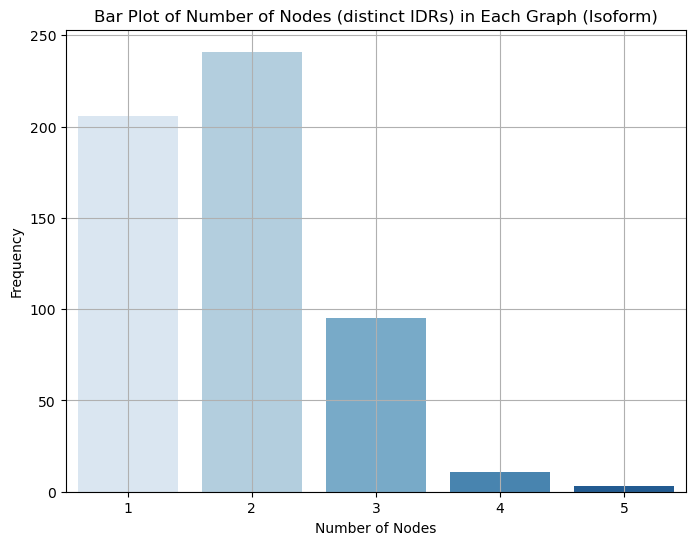

In [40]:
import seaborn as sns

# Calculate the number of nodes for each graph
num_nodes = [graph.num_nodes for graph in graphs]

# Create a bar plot for the number of nodes
plt.figure(figsize=(8, 6))
sns.countplot(x=num_nodes, palette="Blues")
plt.title('Bar Plot of Number of Nodes (distinct IDRs) in Each Graph (Isoform)')
plt.xlabel('Number of Nodes')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [44]:
import pickle

# Save the graphs to a file
with open('GNN_data/graphs_processed.pkl', 'wb') as f:
    pickle.dump(graphs, f)

In [41]:
merged_df.shape

(1032, 104)

In [45]:
data = graphs[0]
print("Node Features (x):")
print(data.x)  # The feature matrix of nodes

print("\nEdge Index (edge_index):")
print(data.edge_index)  # The edges between nodes, where edge_index[0] is the source and edge_index[1] is the target

print("\nGraph Label (y):")
print(data.y)  # The label or target for the entire graph (for regression or classification)

print("\nNumber of Nodes:", data.x.size(0))  # The number of nodes (rows in the feature matrix) 
print("Number of Node Features:", data.x.size(1))  # The number of features per node (columns in the feature matrix)
print("Number of Edges:", data.edge_index.size(1))  # The number of edges (columns in edge_index)

Node Features (x):
tensor([[ 2.8000e+01,  1.0000e+00,  2.8000e+01,  0.0000e+00,  0.0000e+00,
          2.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,
          0.0000e+00,  5.0000e+00,  4.0000e+00,  1.0000e+00,  9.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          2.0000e+00,  0.0000e+00,  2.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  1.0000e+00,  1.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00,  8.0000e+00,
          1.0000e+0